<a href="https://colab.research.google.com/github/tjkela19/UoW_Machine_Learning_tutorial/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

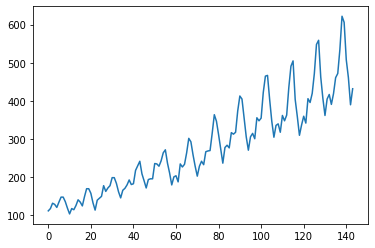

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('/content/sample_data/airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()


In [12]:
 import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [3]:
np.random.seed(7)

In [4]:
dataset1 = dataset.values
dataset1 = dataset.astype('float32')


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1)


In [6]:
# split into train and test sets
train_size = int(len(dataset1) * 0.67)
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset),:]
print(len(train), len(test))


96 48


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset1, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset1)-look_back-1):
		a = dataset1[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset1[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [14]:
import numpy as np
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [16]:
#create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
94/94 - 2s - loss: 0.0357 - 2s/epoch - 24ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0165 - 168ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0131 - 158ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0119 - 183ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0110 - 197ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0100 - 231ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0090 - 189ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0081 - 179ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0071 - 193ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0063 - 190ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0055 - 191ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0049 - 192ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0042 - 182ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0036 - 189ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0032 - 187ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0029 - 180ms/epoc

In [17]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


2/2 [==============================] - 0s 5ms/step
Train Score: 22.74 RMSE
Test Score: 49.75 RMSE


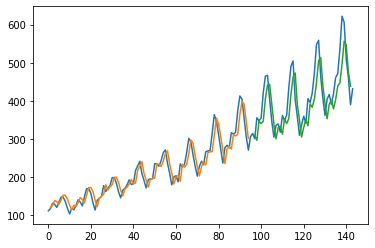

In [20]:
# shift train predictions for plotting
trainPredictPlot= np.empty_like(dataset1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset1)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
